In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Part 1

(a)

Since all of three graph are undirected graphs. They are obviously irreducible. However, graph 1 is aperiodic since when $X_0 = 1, X_t = 3$ we can find that $\text{gcd}(t_1, t_2,...) = 2$ since we can reach it when $t = 2 + 2 k_1 + 10  k_2$ where $k_1$ refers to backward and forward times and $k_2$ refers to the number that walk through the whole circle. On the other hand, graph 2 is aperiodic because we can reach any note  after walking through a circle(We get $t = 9$). Then $t$ could be an odd number. If we walk backwawrd and forward, we can get $2 k_1$ time. We can find $t_1 = m, t_n = m + 2 k_1 + 9k_2$ that satisfies $gcd(t_1, t_n) = 1$ where $m$ refers to the time to reach that node directly. Therefore, $\text{gcd}(t_1, t_2,...) = 1$. Graph 3 is aperiodic since we can always find $t_1 = m, t_n = m + 2 k_1 + 9k_2 + 4 k_3$ that satisfies $gcd(t_1, t_n) = 1$ where $m$ refers to the time to reach that node directly and $k_3$ refers to the pure times of walking from node 1 to node 5.

(b)

In [2]:
def CreateP1():
    P = np.zeros((10,10))
    for i in range(10):
        P[i][i-1] = P[i][(i+1)%10] = 0.5
    return P

def CreateP2():
    P = np.zeros((9,9))
    for i in range(9):
        P[i][i-1] = P[i][(i+1)%9] = 0.5
    return P

def CreateP3():
    P = np.zeros((9,9))
    for i in range(9):
        P[i][i-1] = P[i][(i+1)%9] = 0.5
    P[0][4] = P[0][1] = P[0][-1] = 1/3
    P[4][0] = P[4][3] = P[4][5] = 1/3
    return P

def GetInitalState(num_state):
    D = np.zeros((1, num_state))
    D[0][0] = 1
    return D

def GetTV(D, PI):
    return 0.5 * np.sum(np.abs(D-PI))

# use pow iteration algorithm to get PI
def GetPI2():
    D2 = GetInitalState(9)
    P2 = CreateP2()
    for _ in range(10):
        P2 = P2 @ P2
    return D2 @ P2


def GetPI3():
    D3 = GetInitalState(9)
    P3 = CreateP3()
    for _ in range(10):
        P3 = P3 @ P3
    return D3 @ P3

In [3]:
D1 = GetInitalState(10)
P1 = CreateP1()
PI1 = np.ones((1,10)) / 10

D2 = GetInitalState(9)
P2 = CreateP2()
PI2 = GetPI2()

D3 = GetInitalState(9)
P3 = CreateP3()
PI3 = GetPI3()

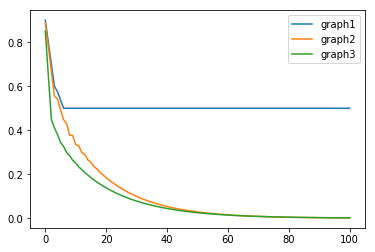

In [4]:
DT = np.zeros((101,3))

for t in range(101):
    DT[t][0] = GetTV(D1, PI1)
    DT[t][1] = GetTV(D2, PI2)
    DT[t][2] = GetTV(D3, PI3)
    D1 = D1 @ P1
    D2 = D2 @ P2
    D3 = D3 @ P3
    
T = np.arange(0,101)

plt.plot(T,DT[:,0])
plt.plot(T,DT[:,1])
plt.plot(T,DT[:,2])
plt.legend(['graph1', 'graph2', 'graph3'])
plt.show();

(c)

In [5]:
U1,S1,VT1 = np.linalg.svd(P1)
U2,S2,VT2 = np.linalg.svd(P2)
U3,S3,VT3 = np.linalg.svd(P3)
print('the second largest eigenvalue of the trainsition matrix')
print('graph1 = %6f'%S1[1]**2)
print('graph2 = %6f'%S2[1]**2)
print('graph3 = %6f'%S3[1]**2)

the second largest eigenvalue of the trainsition matrix
graph1 = 1.000000
graph2 = 0.883022
graph3 = 0.939282


(d)

From (b), we can find that DV of graph2 and graph3 converge to zero while DV of graph1 converges to $0.5$. From (c), we can find that the second largest eigenvalue of graph1 is one.

In [6]:
print('ratio of the second largest eigenvalue to the largest eigenvalue')
print('graph2 = %6f'% (S2[0]**2 / S2[1]**2))
print('graph3 = %6f'% (S3[0]**2 / S3[1]**2))

ratio of the second largest eigenvalue to the largest eigenvalue
graph2 = 1.132474
graph3 = 1.141281


Mathematically, the "time until we are close to $\pi$" is known as the mixing time of the chain, and is defined as the minimum time $t$ s.t. no matther where we start(i.e. for all states $s$), the distance between $D(t,s)$ and $\pi$ is at most $\frac{1}{4}$. From the ratio result above, we can find that the larger ratio of eigenvalue, the faster convergence speed the graph has. This link mixing time with power iteration algorithm since the ratio value $\frac{\lambda_{1}}{\lambda_{2}}$ determins the requisite iteration number to find the first eigenvalue(when initial vector is chosen randomly). Although the initial state $v$ is not chosen randomly, it illusrates that in most setting, the ratio between the two largest eigenvalues of a transition matrix roughly correspond to the rate at which $vP^T$ converges to $\pi$

# Part 2

In [156]:
reading = np.loadtxt("parks.csv", dtype=np.str, delimiter=",")[1:]
parks_name = reading[:,0]
parks_loc = np.zeros(reading[:,1:].shape)
parks_len = len(parks_loc)
for i in range(len(reading)):
    parks_loc[i][0] = float(reading[i][1])
    parks_loc[i][1] = float(reading[i][2])
print(parks_name.shape, parks_loc.shape, parks_len)

def distance(indexes):
    indexes_ = np.append(indexes, indexes[0])
    return np.sum(np.sqrt(np.sum((parks_loc[indexes_[:-1]] - parks_loc[indexes_[1:]])**2, axis=1)))

distance(np.arange(parks_len))

(30,) (30, 2) 30


491.91817144615464

(a)

Implement the MCMC algorithm. How many states are in this Markov chain? If MAXITER tends to infinity, will you eventually see all possible routes? [Hint: consider separately the cases of $T = 0$ and $T > 0$.]

In [235]:
def MCMC(MAXITER, T):
    route = np.arange(parks_len)
    np.random.shuffle(route)
    best = np.copy(route)
    d_b = distance(best)    
#     print(best, d_b)

    distance_list = np.zeros(MAXITER)

    
    for i in range(1, MAXITER+1):
        swap_pos = np.random.randint(parks_len)
        route_new = np.copy(route)
        tmp = route_new[swap_pos]
        route_new[swap_pos] = route_new[(swap_pos+1)%parks_len]
        route_new[(swap_pos+1)%parks_len] = tmp
        
        d_n = distance(route_new)
        d_o = distance(route)
        distance_list[i-1] = d_n
        delta = d_n - d_o
        if delta < 0 or (T>0 and np.random.rand() < np.exp(-delta/T)):
            route = route_new
            if d_n < d_b:
                best = route
                d_b = d_n
            
    return best, distance(best), distance_list
    

print(MCMC(10000, 1))

(array([ 5,  1, 12, 27, 18, 28,  6, 19, 25,  7, 22, 10, 16,  8,  3, 29, 23,
       20,  9, 15, 24, 21, 11, 13, 14,  0, 26,  2,  4, 17]), 371.8219770703999, array([ 567.04449251,  558.29295678,  555.36208579, ...,  389.55673065,
        371.9836623 ,  381.14747956]))


<font color='blue'>
    There are $\frac{30!}{30} = 29!$ states in this Markov chain.<br>
    When $T=0$, only when $distance_{new} < distance_{old}$ will renew the route. In this case, distance may not get larger, so even if MAXITER tends to infinity, we can only see the states which $distance < distance_{initialization}$. <br>
    When $T>0$, not only when $distance_{new} < distance_{old}$ will renew the route, but also still have posibility to get larger distance. So when MAXITER tends to infinity, we can probably see all the states. <br>

(b)

Set MAXITER to be $10, 000$. Run the algorithm in four different regimes, with $T ∈
\{0, 1, 10, 100\}$. For each value of $T$, run 10 trials. Produce one figure for each value of $T$. In each
figure, plot a line for each trial: the iteration number against the length of the current value of route
(not the current value of best) during that iteration. (Your solution to this part should have 4 figures,
and each plot should contain 10 lines.) Among the 4 values of $T$, which one seems to work the best?

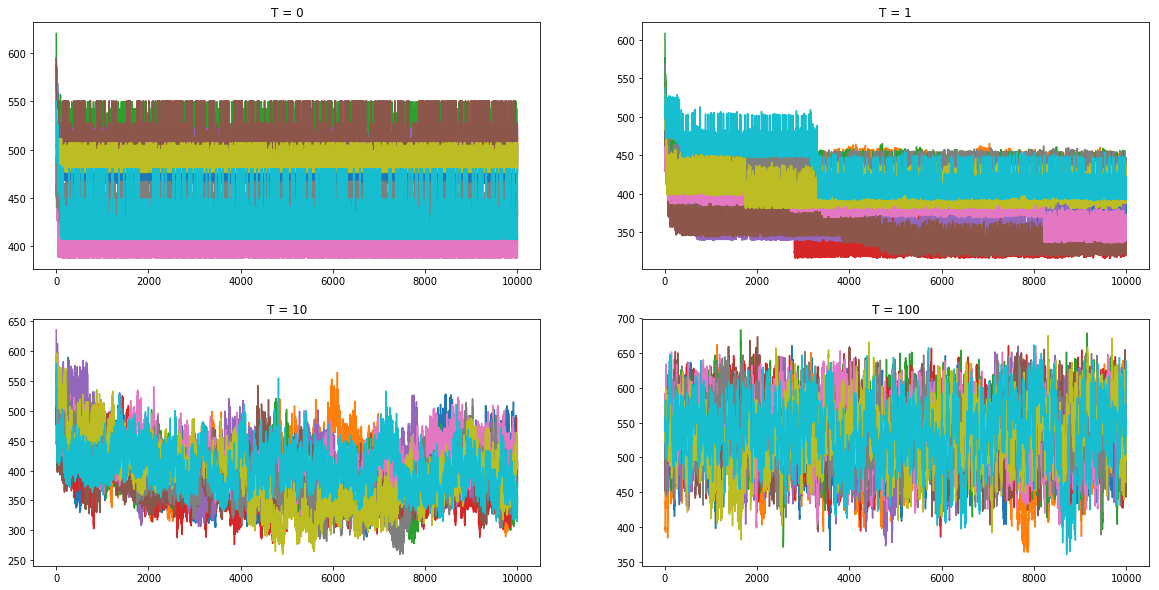

T =    0, smallest distance = 387.411, averange distance = 450.350
T =    1, smallest distance = 316.085, averange distance = 366.556
T =   10, smallest distance = 259.146, averange distance = 288.950
T =  100, smallest distance = 360.133, averange distance = 378.236
The smallest distance is 259.146150 units, the path is: 
[ 1 29 19 13 14  8  0  9 15  3 11  5 27 12 26 16 24 23 20 21 22 17 25 28 18
  7 10  2  6  4]


In [249]:
T_lists = [0, 1, 10, 100]
trial_num = 10
MAXITER = 10000

plt.figure(figsize=[20, 10])
distance_list = np.zeros((len(T_lists), trial_num))
smallest_distance = 1000
best_result = None

for i in range(len(T_lists)):
    T = T_lists[i]
    plt.subplot(2, 2, i+1)
    plt.title('T = %d'%(T))
    for _ in range(trial_num):
#         print(i, _)
        path, dis, log = MCMC(MAXITER, T)
        plt.plot(np.arange(MAXITER), log)
        distance_list[i, _] = dis
        if dis < smallest_distance:
            smallest_distance = dis
            best_result = path
        
plt.show()

for i in range(len(T_lists)):
    print("T = %4d, smallest distance = %3.3lf, averange distance = %3.3lf" 
          % (T_lists[i], np.min(distance_list[i,:]), np.average(distance_list[i,:])))

print('The smallest distance is %lf units, the path is: ' % (smallest_distance))
print(best_result)

<font color='blue'>
    The best T is $T=10$, which get smallest distance, and smallest averange distance.<br>
    The larger T we use, the more instable data will be. Instable data may help to find smaller distance, and help to jump out of local solution. In the other hand, too large T will cause the data not convergent (such as $T=100$).

(c)

Modify the above MCMC algorithm as follows: in each iteration select two parks at random
(not necessarily successive parks) and propose the route obtained by switching them. Repeat the
experiments from part (b). Among the 4 values of T, which one seems to work the best now?

In [239]:
def MCMC_(MAXITER, T):
    route = np.arange(parks_len)
    np.random.shuffle(route)
    best = np.copy(route)
    d_b = distance(best)    
#     print(best, d_b)

    distance_list = np.zeros(MAXITER)

    
    for i in range(1, MAXITER+1):
        swap_pos1 = np.random.randint(parks_len)
        swap_pos2 = np.random.randint(parks_len)
        route_new = np.copy(route)
        tmp = route_new[swap_pos1]
        route_new[swap_pos1] = route_new[swap_pos2]
        route_new[swap_pos2] = tmp
        
        d_n = distance(route_new)
        d_o = distance(route)
        distance_list[i-1] = d_n
        delta = d_n - d_o
        if delta < 0 or (T>0 and np.random.rand() < np.exp(-delta/T)):
            route = route_new
            if d_n < d_b:
                best = route
                d_b = d_n
            
    return best, distance(best), distance_list
    

print(MCMC_(10000, 1))

(array([28, 23, 25, 17, 29,  5, 11, 12,  1,  6, 19,  4, 13, 24,  2, 26, 16,
        0,  8, 14,  9, 15,  3, 27, 10, 21, 22, 20,  7, 18]), 178.56214298228159, array([ 550.15453778,  547.74932041,  547.74932041, ...,  192.29699071,
        187.38558403,  196.46605731]))


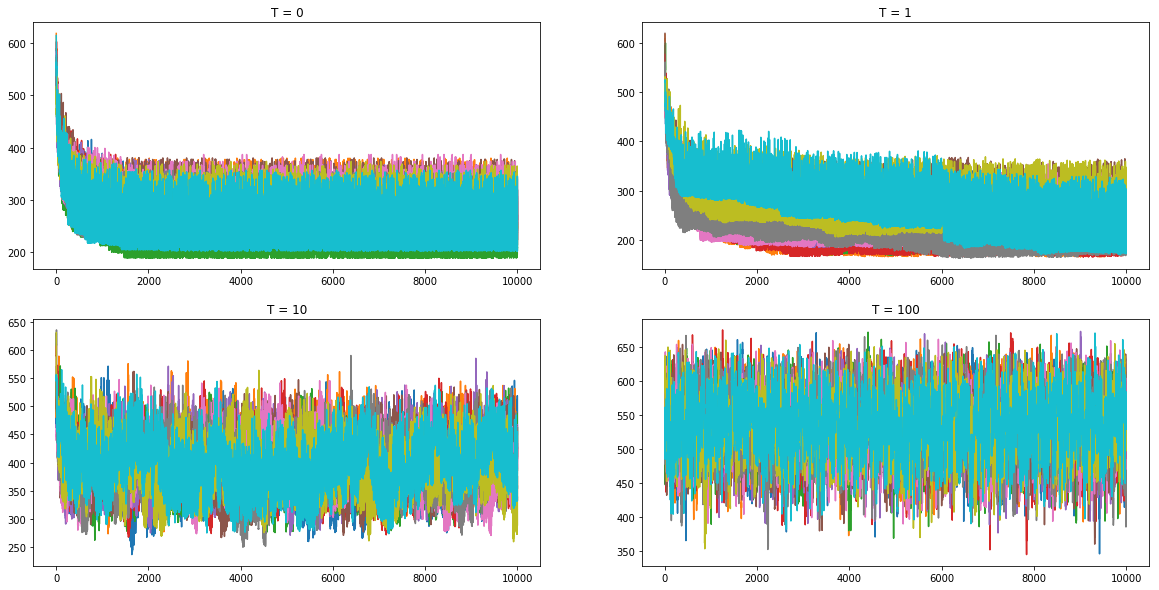

T =    0, smallest distance = 188.940, averange distance = 214.757
T =    1, smallest distance = 163.971, averange distance = 177.466
T =   10, smallest distance = 236.212, averange distance = 262.836
T =  100, smallest distance = 344.306, averange distance = 364.235
The smallest distance is 163.971099 units, the path is: 
[ 7 18 23 28 25 17 11 29  5  6  1 19  4 13  3 15  9 14  8  0 16 26  2 24 12
 27 10 21 22 20]


In [250]:
T_lists = [0, 1, 10, 100]
trial_num = 10
MAXITER = 10000

plt.figure(figsize=[20, 10])
distance_list = np.zeros((len(T_lists), trial_num))
smallest_distance = 1000
best_result = None

for i in range(len(T_lists)):
    T = T_lists[i]
    plt.subplot(2, 2, i+1)
    plt.title('T = %d'%(T))
    for _ in range(trial_num):
#         print(i, _)
        path, dis, log = MCMC_(MAXITER, T)
        plt.plot(np.arange(MAXITER), log)
        distance_list[i, _] = dis
        if dis < smallest_distance:
            smallest_distance = dis
            best_result = path
        
plt.show()

for i in range(len(T_lists)):
    print("T = %4d, smallest distance = %3.3lf, averange distance = %3.3lf" 
          % (T_lists[i], np.min(distance_list[i,:]), np.average(distance_list[i,:])))

print('The smallest distance is %lf units, the path is: ' % (smallest_distance))
print(best_result)

<font color='blue'>
    The best T is $T=1$, which get smallest distance, and smallest averange distance.

(d)

Describe whatever differences you see relative to part (b), and propose one or more explanations
for why this Markov Chain performs differently from the previous one. If the optimal values
of T are different in the two parts, provide an explanation. (You may wish to think about this part in
the context of the investigation of the mixing times of the different Markov chains in the first problem
of this mini-project.)


<font color='blue'>
    Differences:<br>
    (1) In part(c), we get shoter distance than that in part(b).<br>
    (2) We get the optimal of T smaller (1 vs 10). <br>
    (3) In part(c), data decend more smoothly.<br><br>
    Explain:<br>
    In part(b), we can not only swap nodes successively, so each state of the Markov Chain have only $30$ neighbour states (30 swap position). In part (c), we can swap any 2 nodes, which cause that each state of the Markov Chain have $30*29=870$ neighbour states. In part 1, we know that the larger second largest eigenvalue the plan have, the status converge faster. In this part, for part(c)'s plan the Markov Chain's states have more neighbour states, so part(c)'s plan have larger second largest eigenvalue. For this reason, part(c)'s plan converge faster, and we can get better solution easier. So we can use stricter condition, smaller T, to get the best solution.

# Part 3

(a)